In [12]:
import pandas as pd

# Load the dataset provided by the user
file_path = r'C:\Users\sanja\OneDrive\Desktop\ENI\year4sem1\Time Series and forecasting\archive\consumer_confidence_index_cci.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head(), data.info(),data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    469 non-null    object 
 1   Indicator   469 non-null    object 
 2   Subject     469 non-null    object 
 3   Measure     469 non-null    object 
 4   Frequency   469 non-null    object 
 5   Time        469 non-null    object 
 6   Value       469 non-null    float64
 7   Flag Codes  0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 29.4+ KB


(  Location Indicator   Subject    Measure Frequency     Time     Value  \
 0      FRA       CCI  AMPLITUD  LTRENDIDX         M  2017-01  100.2096   
 1      FRA       CCI  AMPLITUD  LTRENDIDX         M  2017-02  100.1315   
 2      FRA       CCI  AMPLITUD  LTRENDIDX         M  2017-03  100.1785   
 3      FRA       CCI  AMPLITUD  LTRENDIDX         M  2017-04  100.4184   
 4      FRA       CCI  AMPLITUD  LTRENDIDX         M  2017-05  100.8220   
 
    Flag Codes  
 0         NaN  
 1         NaN  
 2         NaN  
 3         NaN  
 4         NaN  ,
 None,
     Location Indicator   Subject    Measure Frequency     Time     Value  \
 464      DEU       CCI  AMPLITUD  LTRENDIDX         M  2022-03  98.87852   
 465      DEU       CCI  AMPLITUD  LTRENDIDX         M  2022-04  98.15732   
 466      DEU       CCI  AMPLITUD  LTRENDIDX         M  2022-05  97.71059   
 467      DEU       CCI  AMPLITUD  LTRENDIDX         M  2022-06  97.24272   
 468      DEU       CCI  AMPLITUD  LTRENDIDX         

In [13]:
# Data Preprocessing
# Retain relevant columns
data_filtered = data[['Location', 'Time', 'Value']]

# Convert 'Time' to datetime and pivot the data to create time series per country
data_filtered['Time'] = pd.to_datetime(data_filtered['Time'])
data_pivoted = data_filtered.pivot(index='Time', columns='Location', values='Value')

# Handle missing values (if any) by forward filling
data_pivoted = data_pivoted.ffill().bfill()

# Display the processed dataset
data_pivoted.head(), data_pivoted.info()
data_pivoted.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67 entries, 2017-01-01 to 2022-07-01
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BEL     67 non-null     float64
 1   DEU     67 non-null     float64
 2   ESP     67 non-null     float64
 3   FRA     67 non-null     float64
 4   ITA     67 non-null     float64
 5   OECD    67 non-null     float64
 6   POL     67 non-null     float64
dtypes: float64(7)
memory usage: 4.2 KB


C:\Users\sanja\AppData\Local\Temp\ipykernel_7664\858170238.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Time'] = pd.to_datetime(data_filtered['Time'])


Location,BEL,DEU,ESP,FRA,ITA,OECD,POL
Time,,,,,,,
2022-03-01,98.52732,98.87852,96.70706,97.65123,98.76920,97.78790,99.03146
2022-04-01,98.21752,98.15732,95.76039,97.03223,98.08763,97.40521,98.82450
2022-05-01,98.11482,97.71059,95.29659,96.75227,97.72804,97.02988,98.68221
2022-06-01,98.07021,97.24272,94.30239,96.49194,97.29221,96.59806,98.66860
2022-07-01,97.98649,96.61540,92.90806,96.25912,96.68706,96.16651,98.57201


In [14]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test
def adf_test(series, country):
    result = adfuller(series)
    print(f"\nADF Test for {country}:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    for key, value in result[4].items():
        print(f"Critical Value ({key}): {value}")
    if result[1] > 0.05:
        print("Result: Non-stationary")
    else:
        print("Result: Stationary")

# Perform ADF test for each country
for country in data_pivoted.columns:
    adf_test(data_pivoted[country], country)


ADF Test for BEL:
ADF Statistic: -3.504591473497734
p-value: 0.007869955320983451
Critical Value (1%): -3.5443688564814813
Critical Value (5%): -2.9110731481481484
Critical Value (10%): -2.5931902777777776
Result: Stationary

ADF Test for DEU:
ADF Statistic: -0.29449654191027597
p-value: 0.9262801779776192
Critical Value (1%): -3.542412746661615
Critical Value (5%): -2.910236235808284
Critical Value (10%): -2.5927445767266866
Result: Non-stationary

ADF Test for ESP:
ADF Statistic: -1.4445425459698422
p-value: 0.5607455519908191
Critical Value (1%): -3.5386953618719676
Critical Value (5%): -2.9086446751210775
Critical Value (10%): -2.591896782564878
Result: Non-stationary

ADF Test for FRA:
ADF Statistic: -2.710570254611308
p-value: 0.0722269461054662
Critical Value (1%): -3.5386953618719676
Critical Value (5%): -2.9086446751210775
Critical Value (10%): -2.591896782564878
Result: Non-stationary

ADF Test for ITA:
ADF Statistic: -3.2598257763369127
p-value: 0.0167725922962959
Critical 

In [15]:
# Apply differencing to non-stationary series to make them stationary
data_diff = data_pivoted.diff().dropna()

# Re-test stationarity for differenced series
for country in data_diff.columns:
    adf_test(data_diff[country], country)


ADF Test for BEL:
ADF Statistic: -2.5281486812749576
p-value: 0.10877478763352838
Critical Value (1%): -3.5386953618719676
Critical Value (5%): -2.9086446751210775
Critical Value (10%): -2.591896782564878
Result: Non-stationary

ADF Test for DEU:
ADF Statistic: -1.4046918127983659
p-value: 0.5800247489698295
Critical Value (1%): -3.542412746661615
Critical Value (5%): -2.910236235808284
Critical Value (10%): -2.5927445767266866
Result: Non-stationary

ADF Test for ESP:
ADF Statistic: -1.8740453104763075
p-value: 0.34436777197867274
Critical Value (1%): -3.5386953618719676
Critical Value (5%): -2.9086446751210775
Critical Value (10%): -2.591896782564878
Result: Non-stationary

ADF Test for FRA:
ADF Statistic: -3.319527506499955
p-value: 0.014027841930054978
Critical Value (1%): -3.540522678829176
Critical Value (5%): -2.9094272025108254
Critical Value (10%): -2.5923136524453696
Result: Stationary

ADF Test for ITA:
ADF Statistic: -2.456516698040525
p-value: 0.12641582432081244
Critical

In [16]:
# Apply second differencing for the remaining non-stationary series
data_diff_second = data_diff.diff().dropna()

# Re-test stationarity for second differenced series (DEU, ESP, OECD)
for country in ['DEU', 'ESP', 'OECD']:
    adf_test(data_diff_second[country], country)


ADF Test for DEU:
ADF Statistic: -6.296323862751453
p-value: 3.498707564402975e-08
Critical Value (1%): -3.542412746661615
Critical Value (5%): -2.910236235808284
Critical Value (10%): -2.5927445767266866
Result: Stationary

ADF Test for ESP:
ADF Statistic: -8.988389714922395
p-value: 6.9992629409879184e-15
Critical Value (1%): -3.5386953618719676
Critical Value (5%): -2.9086446751210775
Critical Value (10%): -2.591896782564878
Result: Stationary

ADF Test for OECD:
ADF Statistic: -6.551820060183578
p-value: 8.812296462018346e-09
Critical Value (1%): -3.542412746661615
Critical Value (5%): -2.910236235808284
Critical Value (10%): -2.5927445767266866
Result: Stationary



ACF and PACF for BEL:


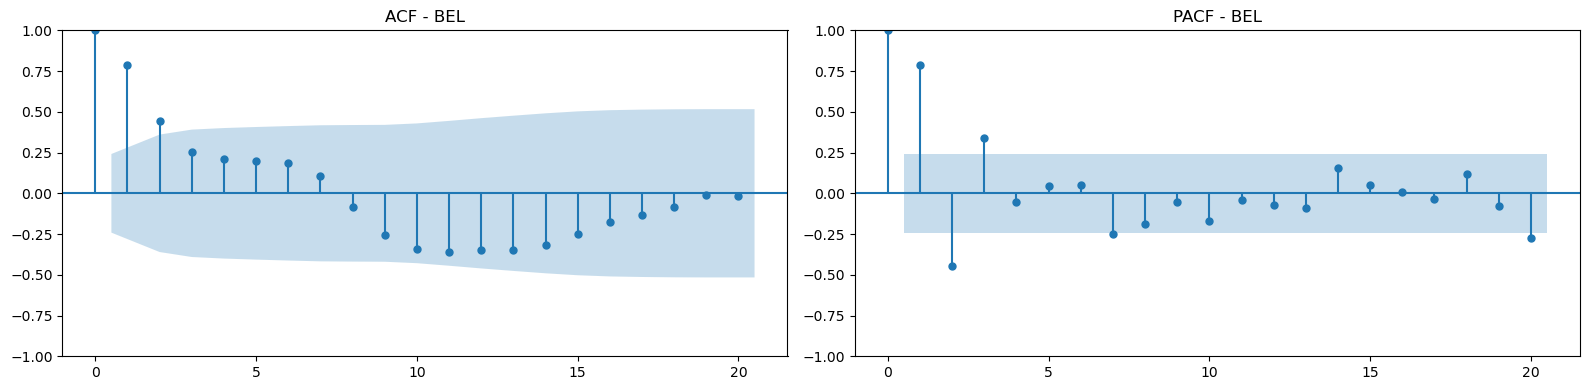


ACF and PACF for DEU:


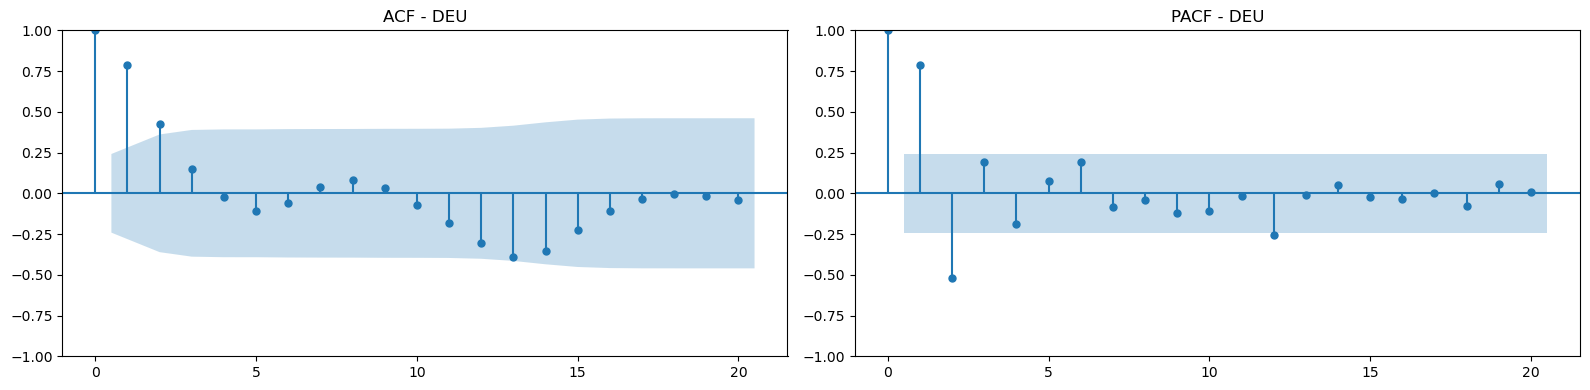


ACF and PACF for ESP:


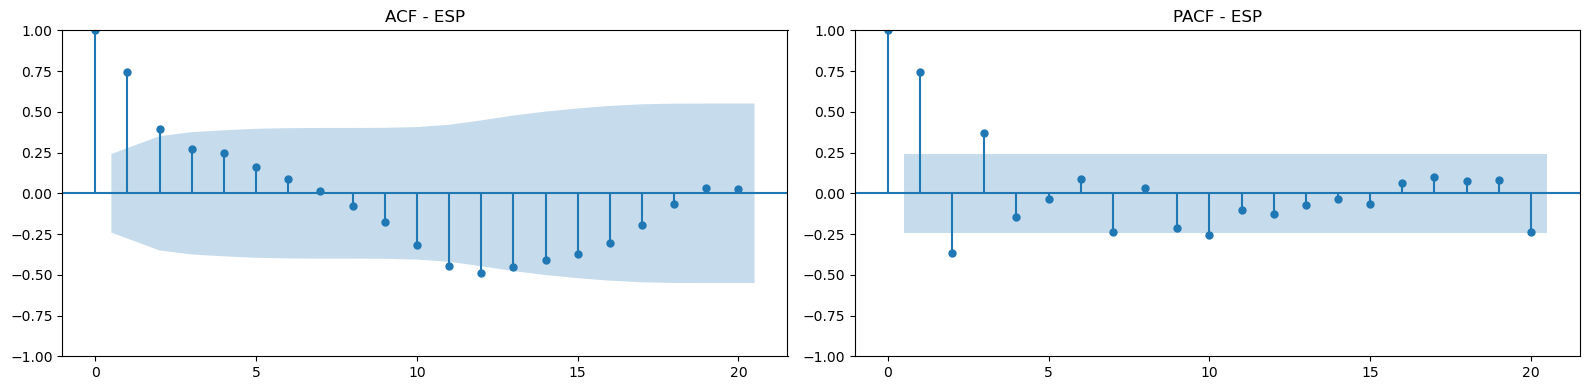


ACF and PACF for FRA:


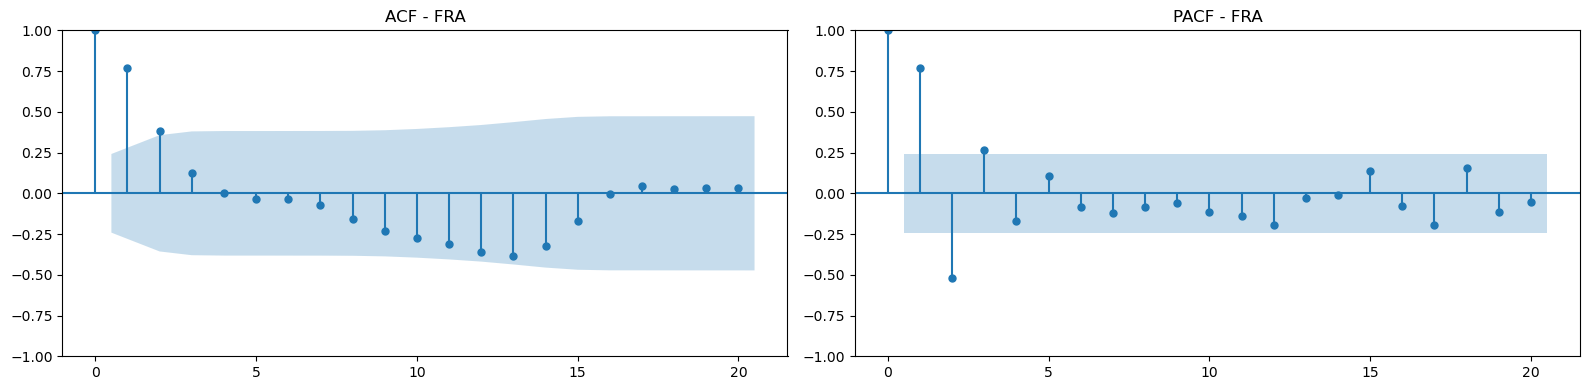


ACF and PACF for ITA:


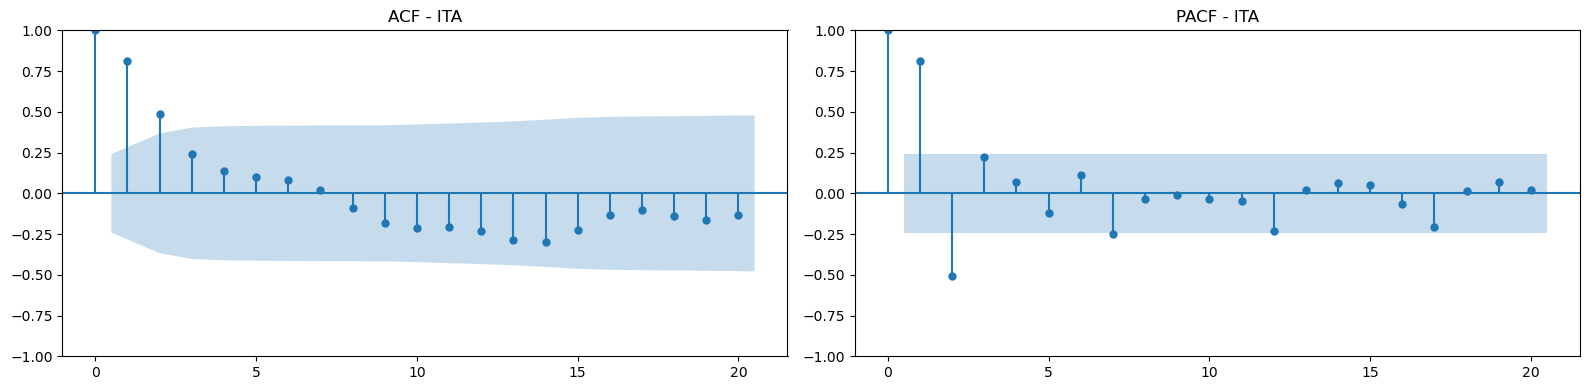


ACF and PACF for OECD:


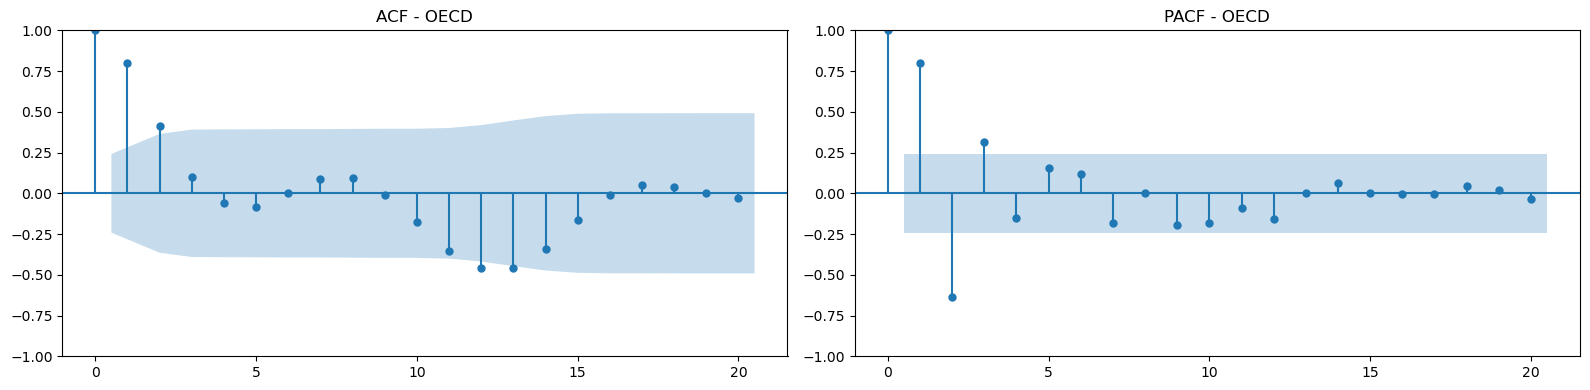


ACF and PACF for POL:


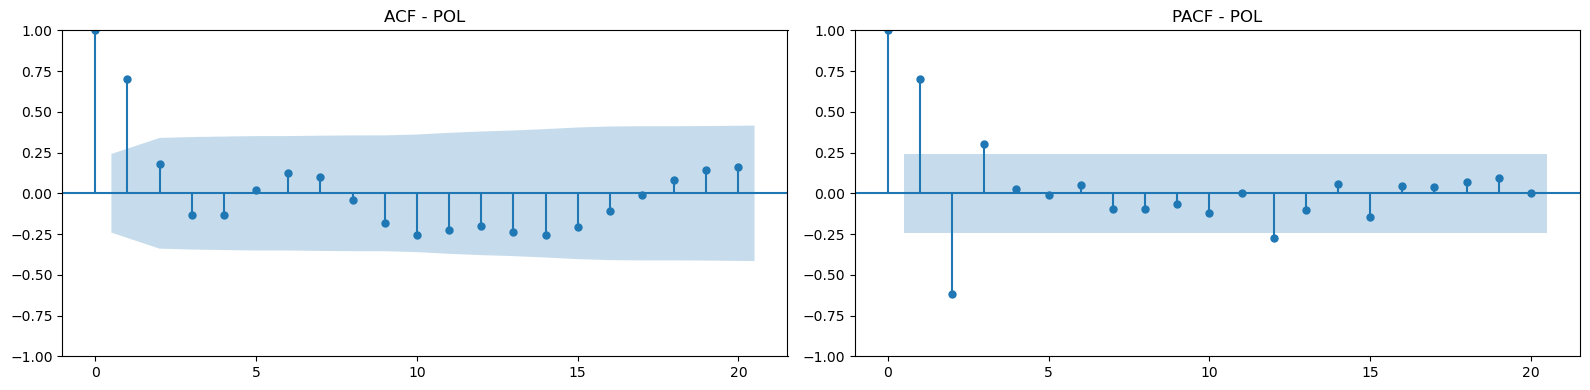

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for each stationary series
for country in data_diff.columns:
    print(f"\nACF and PACF for {country}:")
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    plot_acf(data_diff[country], ax=axes[0], lags=20, title=f'ACF - {country}')
    plot_pacf(data_diff[country], ax=axes[1], lags=20, title=f'PACF - {country}')
    plt.tight_layout()
    plt.show()

In [18]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Function to perform grid search for ARIMA parameters
def arima_grid_search(series, p_values, d_values, q_values):
    best_aic = float("inf")
    best_order = None
    best_model = None
    for p, d, q in itertools.product(p_values, d_values, q_values):
        try:
            model = ARIMA(series, order=(p, d, q))
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = (p, d, q)
                best_model = results
        except:
            continue
    return best_order, best_aic, best_model

# Define parameter ranges for grid search
p_values = range(0, 3)
d_values = [1]  # All series are stationary after differencing once
q_values = range(0, 3)

# Perform ARIMA fitting for each country
best_params = {}
best_models = {}

for country in data_diff.columns:
    print(f"\nFitting ARIMA model for {country}")
    order, aic, model = arima_grid_search(data_diff[country], p_values, d_values, q_values)
    best_params[country] = order
    best_models[country] = model
    print(f"Best ARIMA Order: {order} | AIC: {aic}")

# Display best ARIMA parameters for all countries
best_params


Fitting ARIMA model for BEL


c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS w

Best ARIMA Order: (2, 1, 0) | AIC: -70.10710629535876

Fitting ARIMA model for DEU


c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS w

Best ARIMA Order: (2, 1, 2) | AIC: -78.57083715282792

Fitting ARIMA model for ESP


c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS w

Best ARIMA Order: (2, 1, 0) | AIC: 45.91770877191111

Fitting ARIMA model for FRA


c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS w

Best ARIMA Order: (1, 1, 2) | AIC: -10.451442815056815

Fitting ARIMA model for ITA


c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS w

Best ARIMA Order: (2, 1, 1) | AIC: -27.93523354343707

Fitting ARIMA model for OECD


c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS w

Best ARIMA Order: (2, 1, 2) | AIC: -91.86443968684901

Fitting ARIMA model for POL


c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS w

Best ARIMA Order: (2, 1, 2) | AIC: -12.305526879168326


{'BEL': (2, 1, 0),
 'DEU': (2, 1, 2),
 'ESP': (2, 1, 0),
 'FRA': (1, 1, 2),
 'ITA': (2, 1, 1),
 'OECD': (2, 1, 2),
 'POL': (2, 1, 2)}


Fitting ARIMA((2, 1, 0)) for BEL


c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


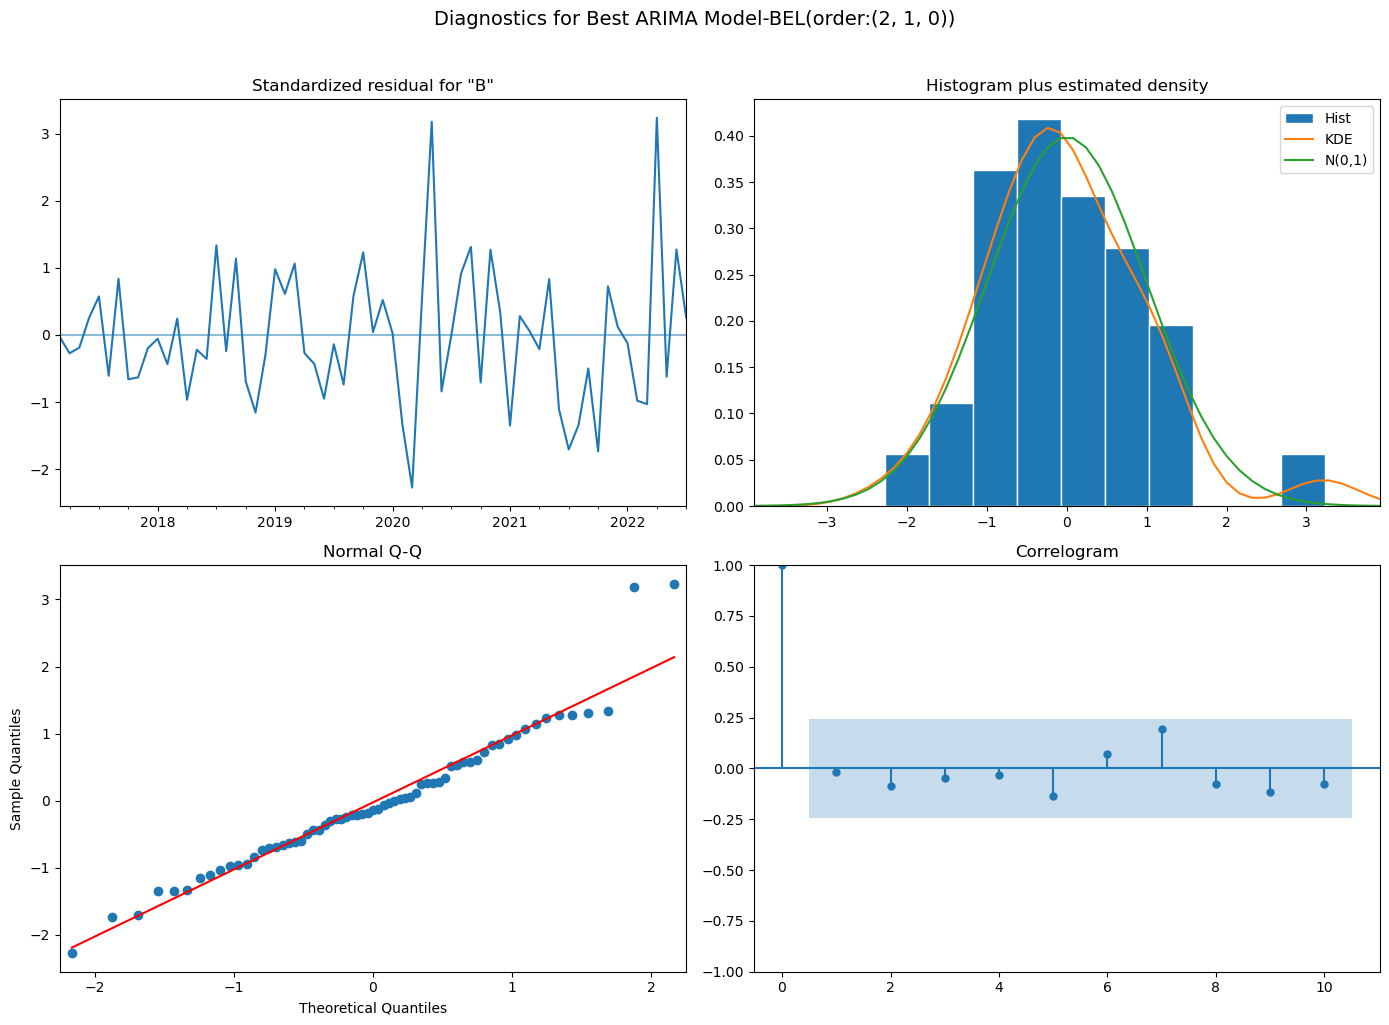


Fitting ARIMA((2, 1, 2)) for DEU


c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


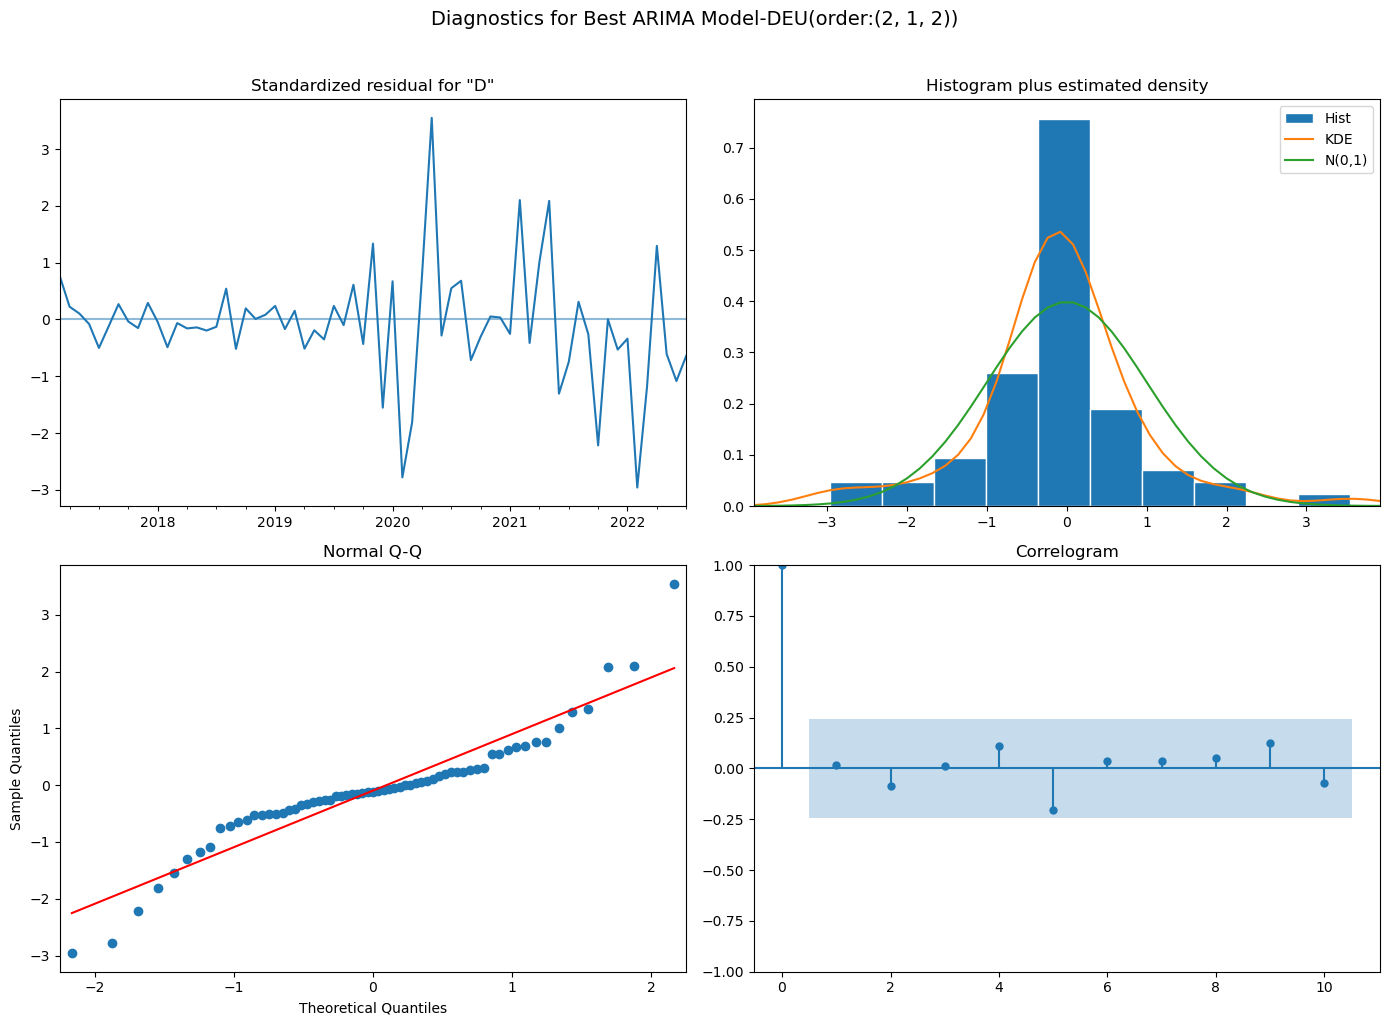


Fitting ARIMA((2, 1, 0)) for ESP


c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


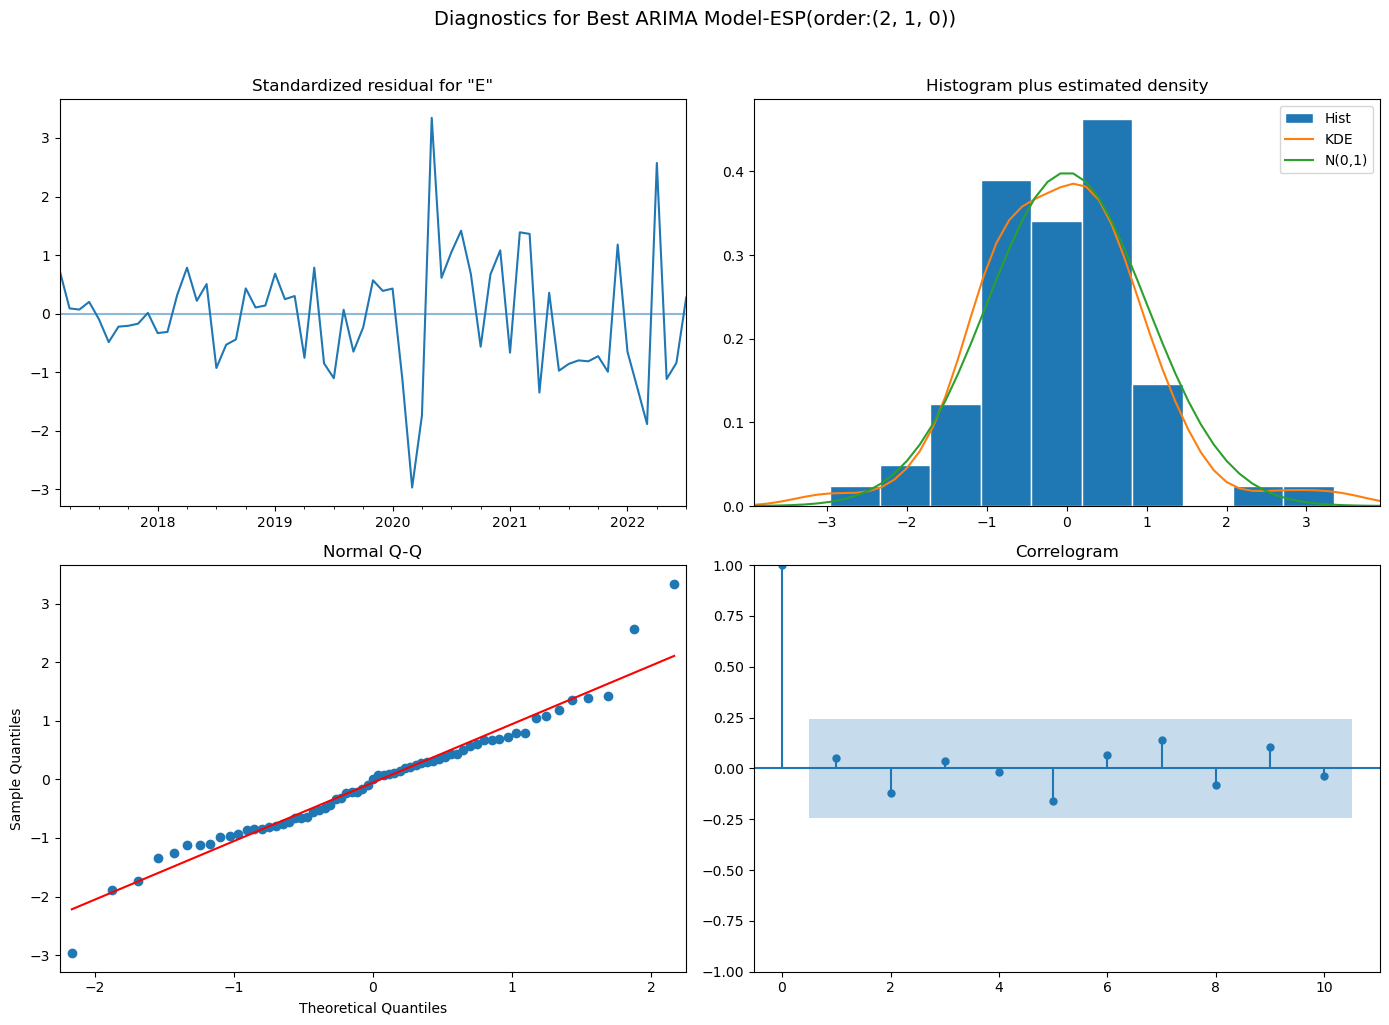


Fitting ARIMA((1, 1, 2)) for FRA


c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


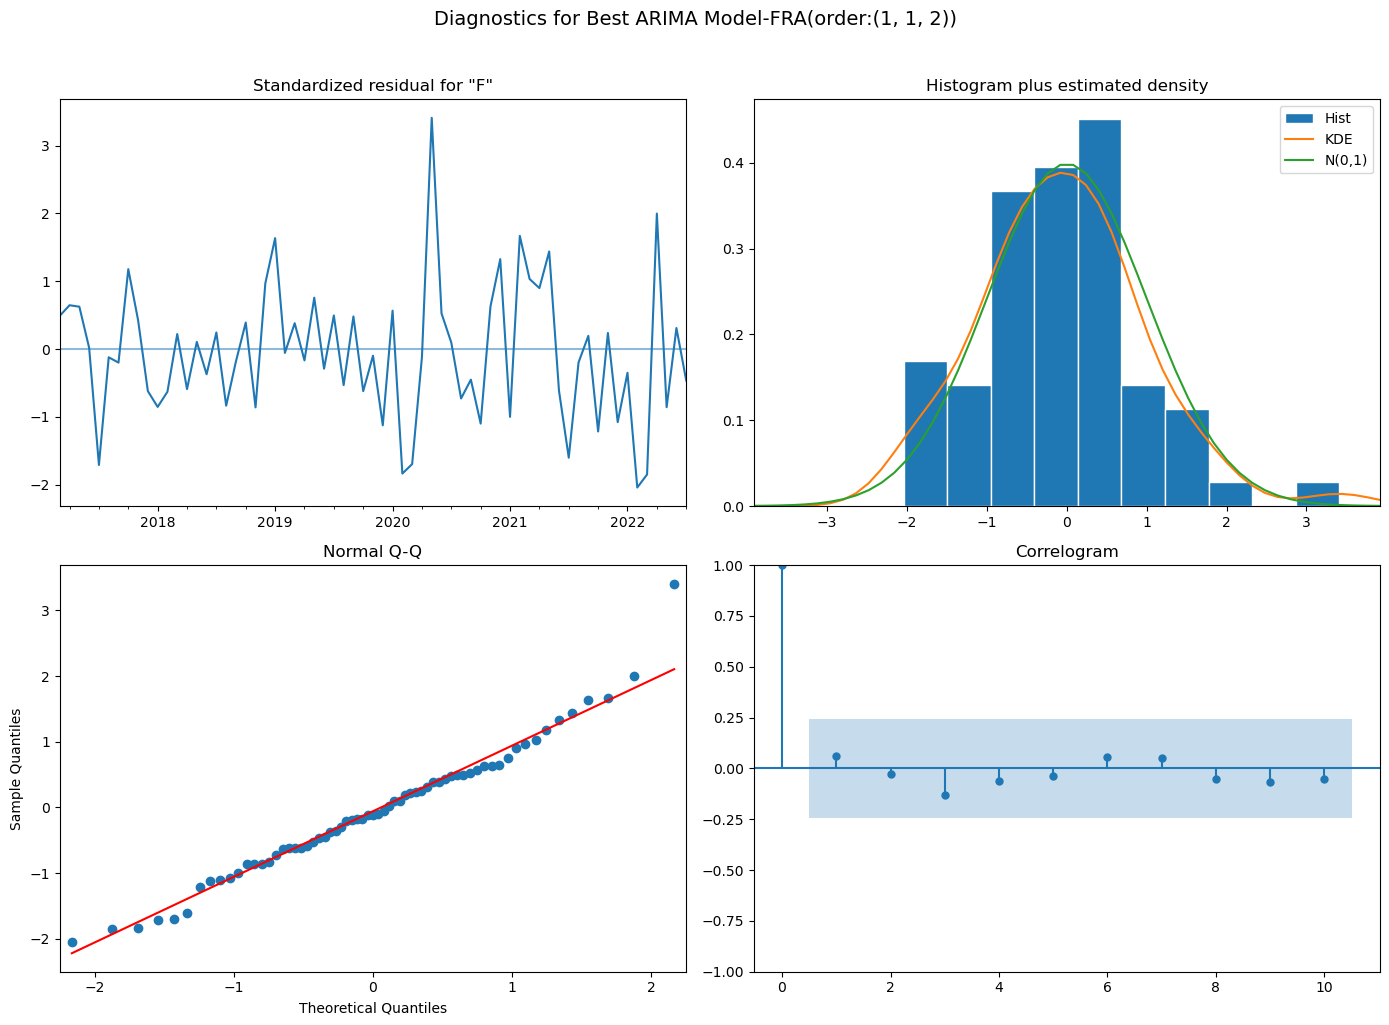


Fitting ARIMA((2, 1, 1)) for ITA


c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


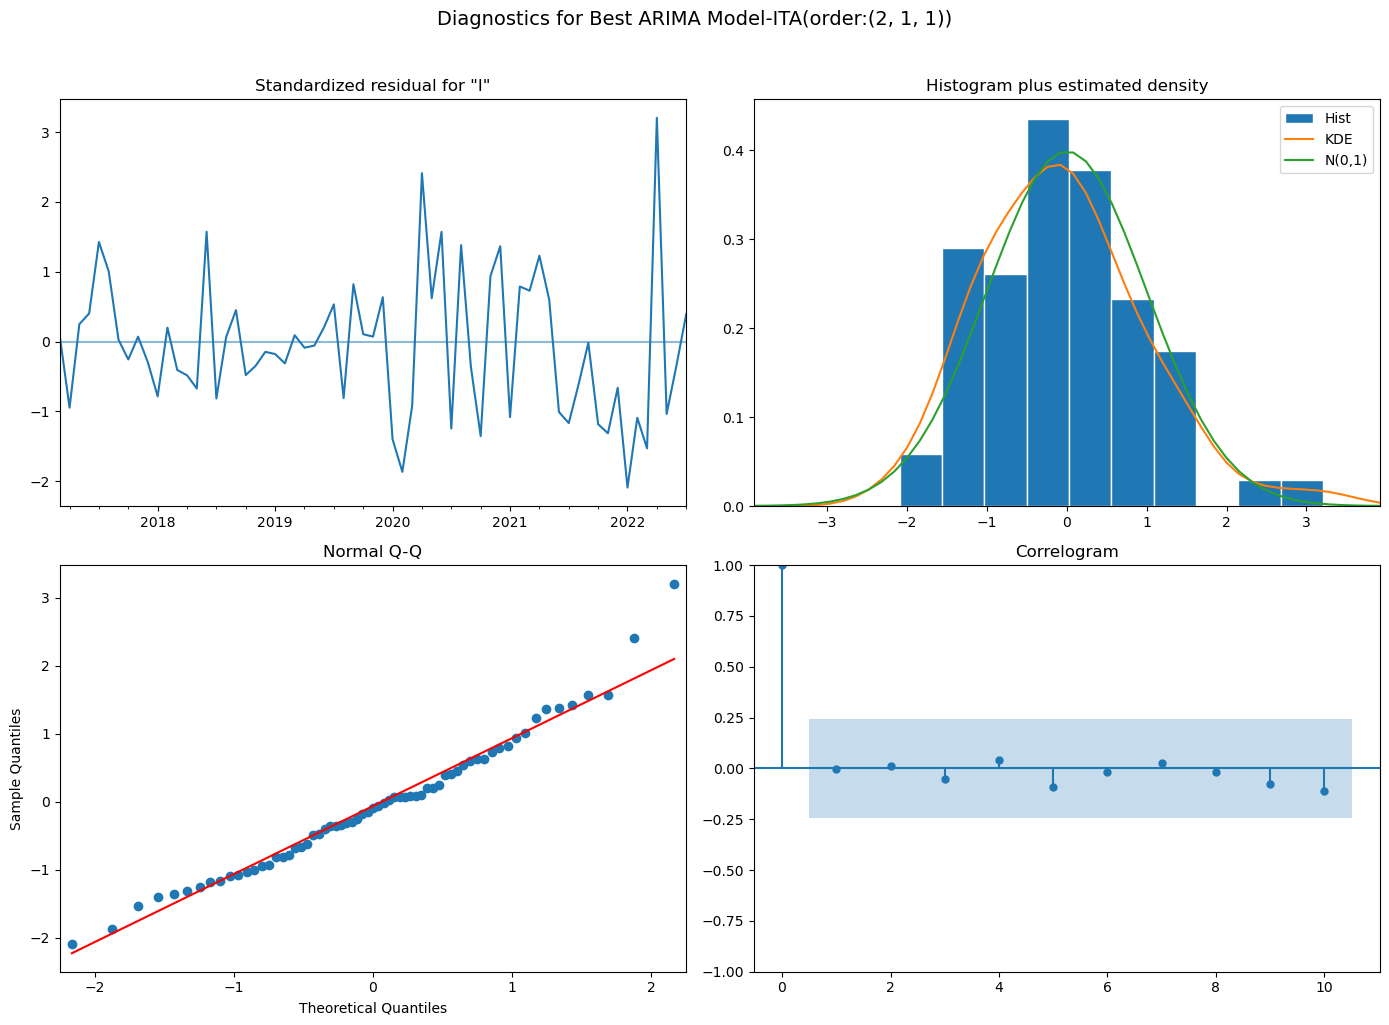


Fitting ARIMA((2, 1, 2)) for OECD


c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


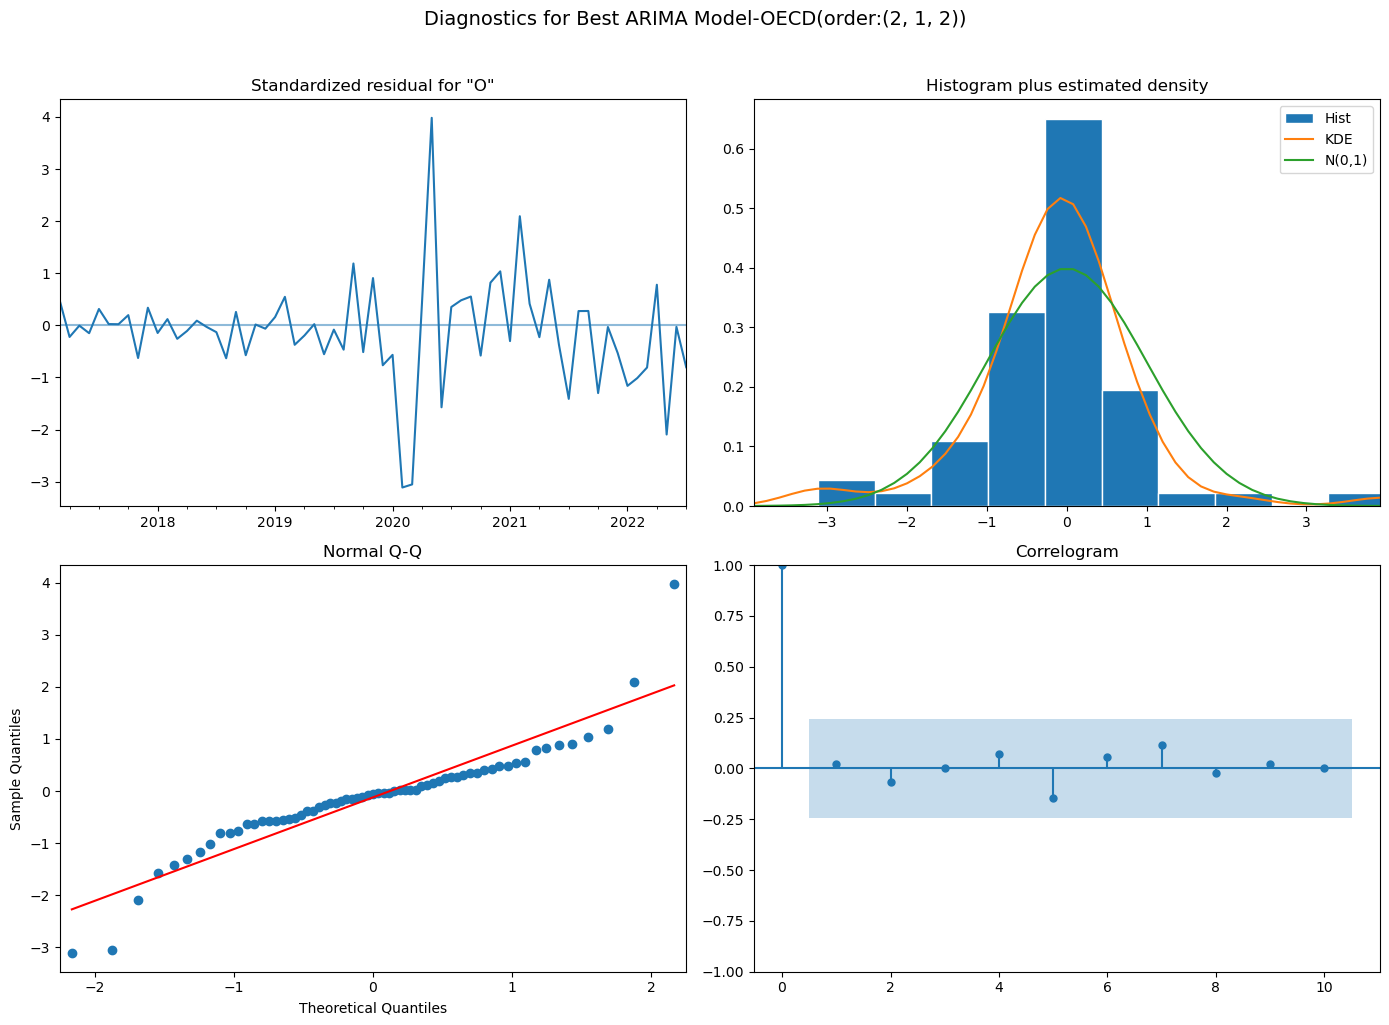


Fitting ARIMA((2, 1, 2)) for POL


c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


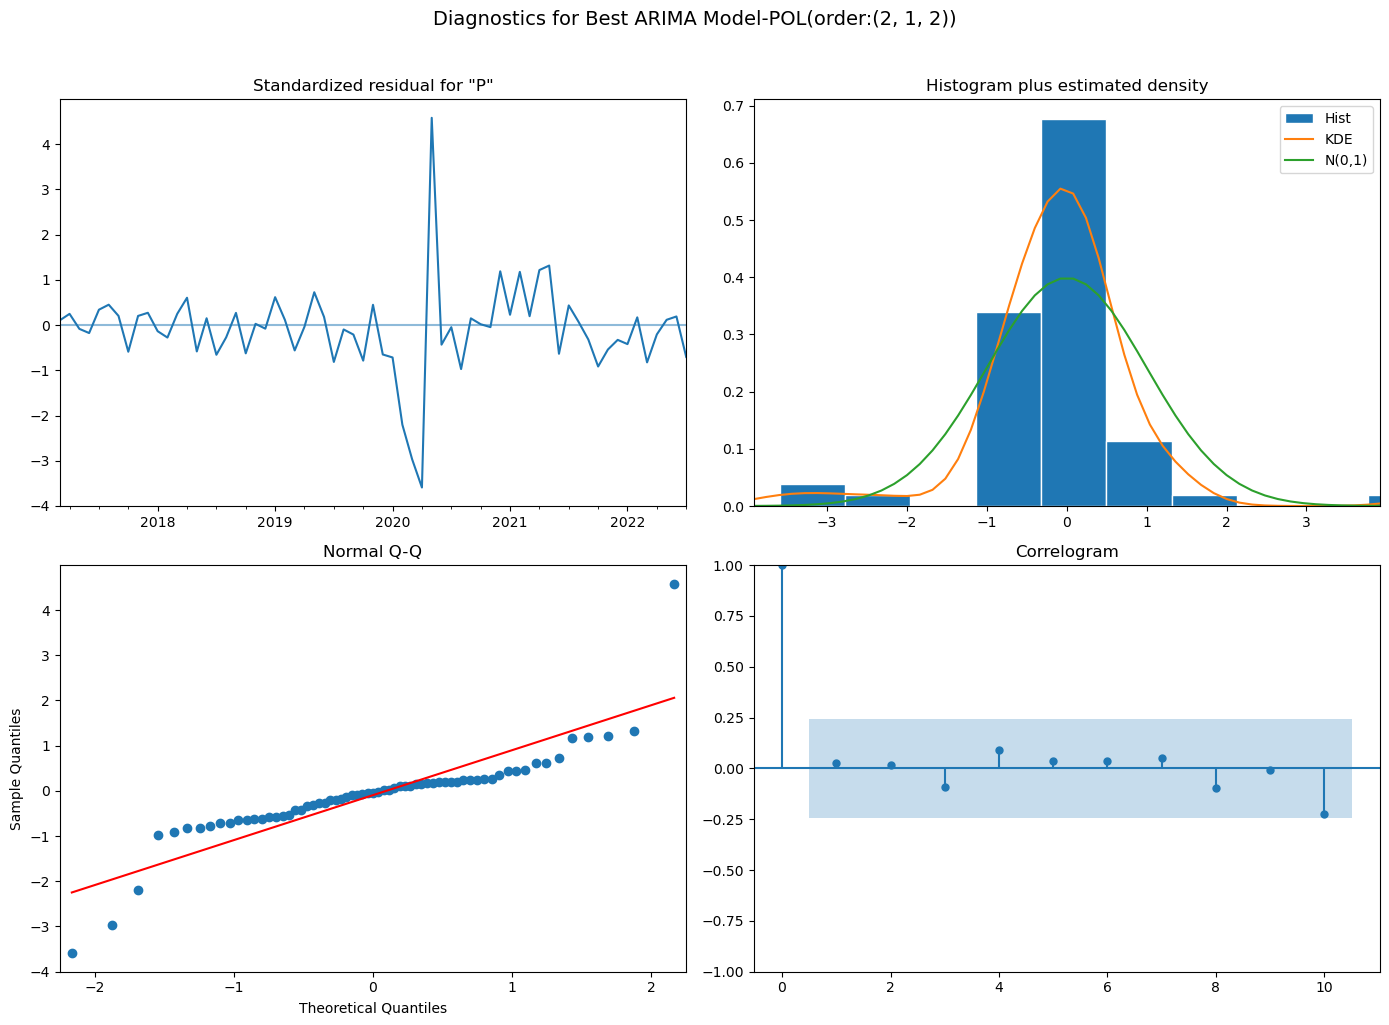

In [20]:
# Fit the ARIMA models using the best parameters and perform diagnostics
import statsmodels.api as sm
from scipy.stats import shapiro

# Function for residual diagnostics
def residual_diagnostics(model, country):
    diagnostics=model.plot_diagnostics(figsize=(14,10))
    plt.suptitle(f"Diagnostics for Best ARIMA Model-{country}(order:{order})",fontsize=14,y=1.02)
    plt.tight_layout()
    plt.show()

# Fit models and perform diagnostics
fitted_models = {}
for country, order in best_params.items():
    print(f"\nFitting ARIMA({order}) for {country}")
    model = ARIMA(data_pivoted[country].diff().dropna(), order=order).fit()
    fitted_models[country] = model
    
    # Residual diagnostics
    residual_diagnostics(model, country)


Finding best ARIMA parameters for BEL


c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS w

Best ARIMA order for BEL: (2, 1, 0) | AIC: -70.10710629535876

Finding best ARIMA parameters for DEU


c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS w

Best ARIMA order for DEU: (2, 1, 2) | AIC: -78.57083715282792

Finding best ARIMA parameters for ESP


c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS w

Best ARIMA order for ESP: (2, 1, 0) | AIC: 45.91770877191111

Finding best ARIMA parameters for FRA


c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS w

Best ARIMA order for FRA: (1, 1, 2) | AIC: -10.451442815056815

Finding best ARIMA parameters for ITA


c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS w

Best ARIMA order for ITA: (2, 1, 1) | AIC: -27.93523354343707

Finding best ARIMA parameters for OECD


c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS w

Best ARIMA order for OECD: (2, 1, 2) | AIC: -91.86443968684901

Finding best ARIMA parameters for POL


c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS w

Best ARIMA order for POL: (2, 1, 2) | AIC: -12.305526879168326

Forecasting for BEL with Corrected Scaling
RMSE for BEL: 751.4573591328659

Forecasting for DEU with Corrected Scaling
RMSE for DEU: 744.2080096751625

Forecasting for ESP with Corrected Scaling


c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS w

RMSE for ESP: 748.3730094714805

Forecasting for FRA with Corrected Scaling
RMSE for FRA: 747.1998761324234

Forecasting for ITA with Corrected Scaling
RMSE for ITA: 758.9303570388641

Forecasting for OECD with Corrected Scaling
RMSE for OECD: 736.3478771133489

Forecasting for POL with Corrected Scaling
RMSE for POL: 742.8742668659258


c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sanja\anaconda3new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS w

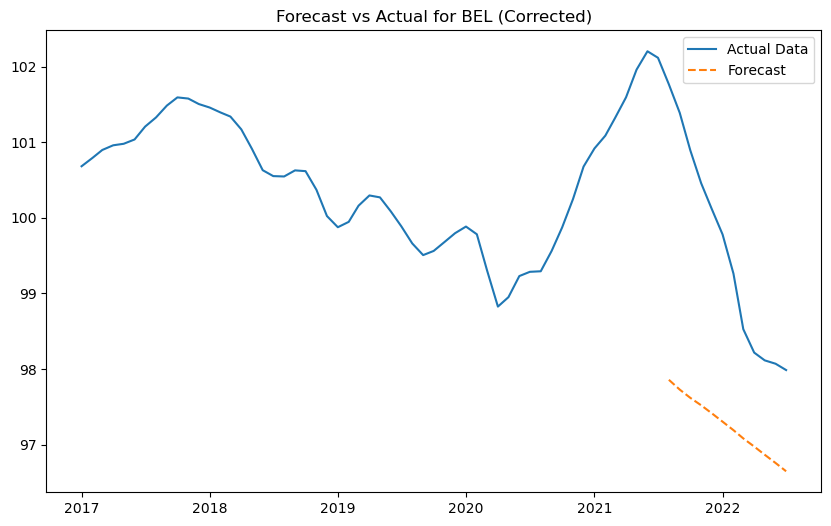

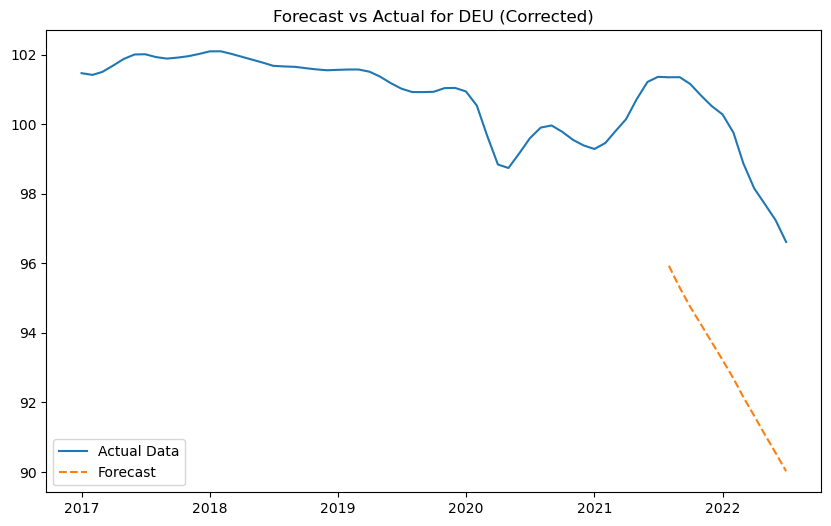

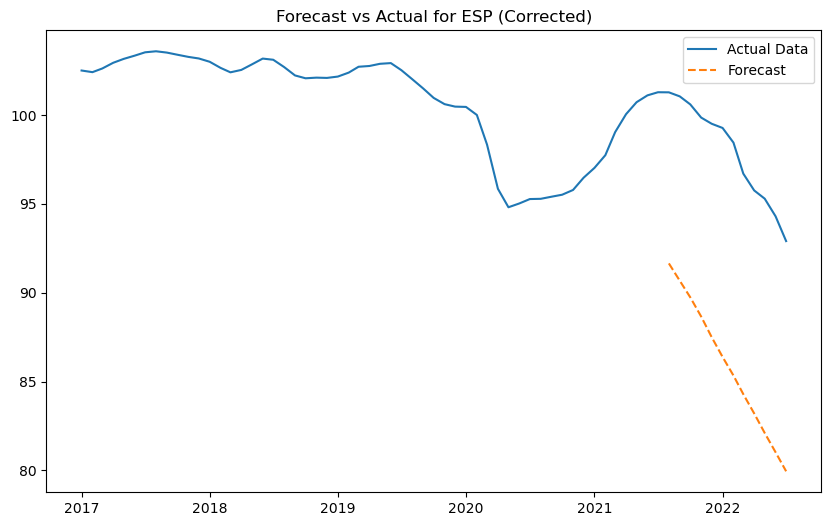

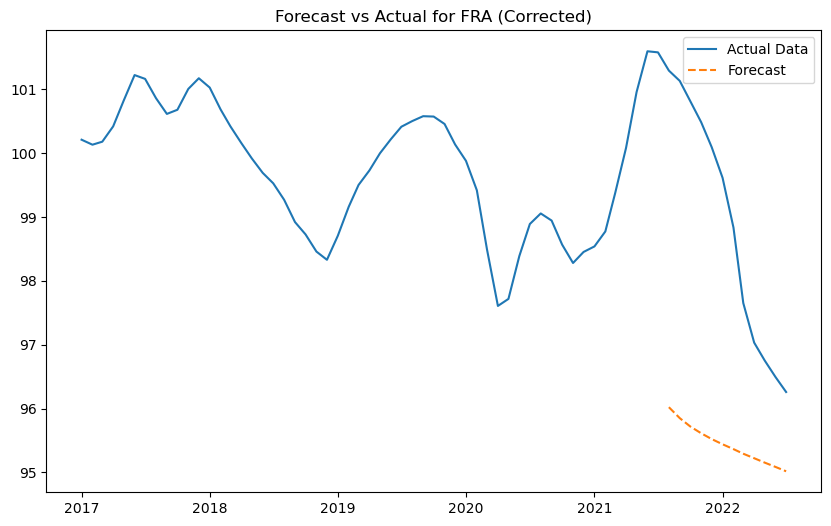

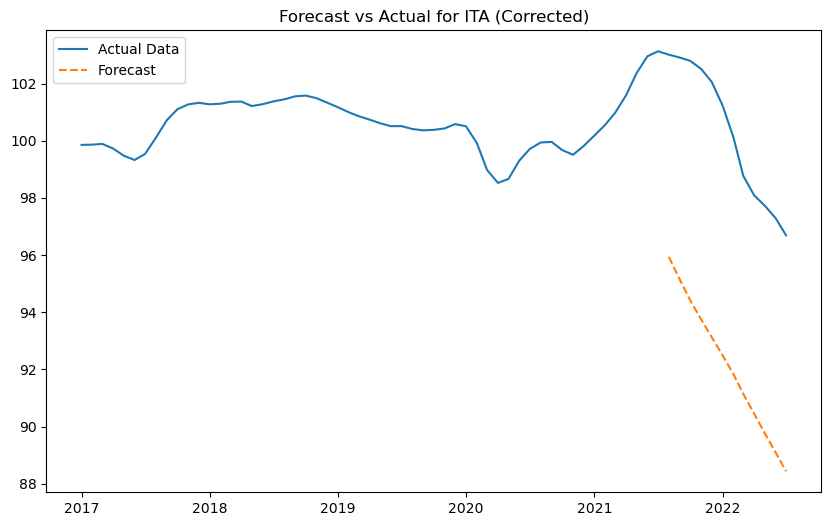

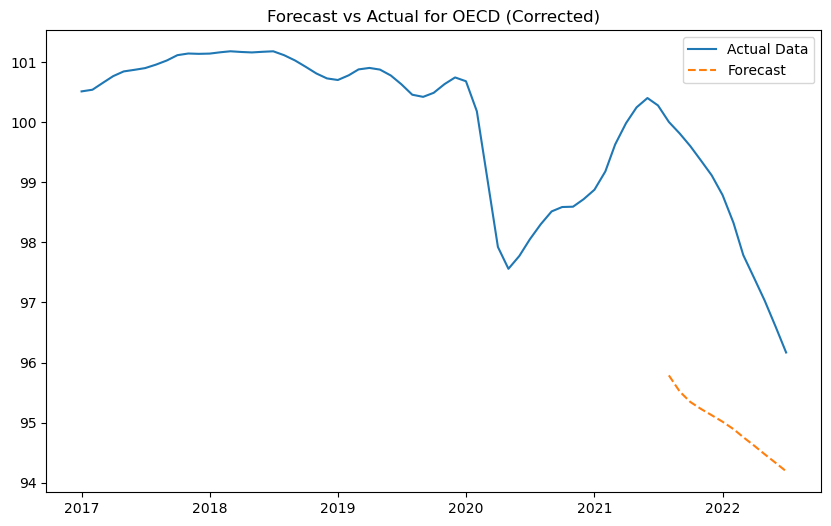

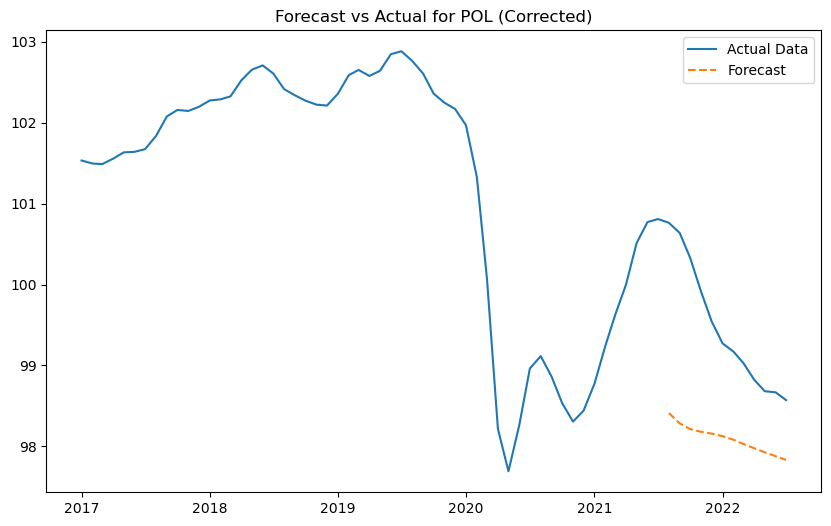

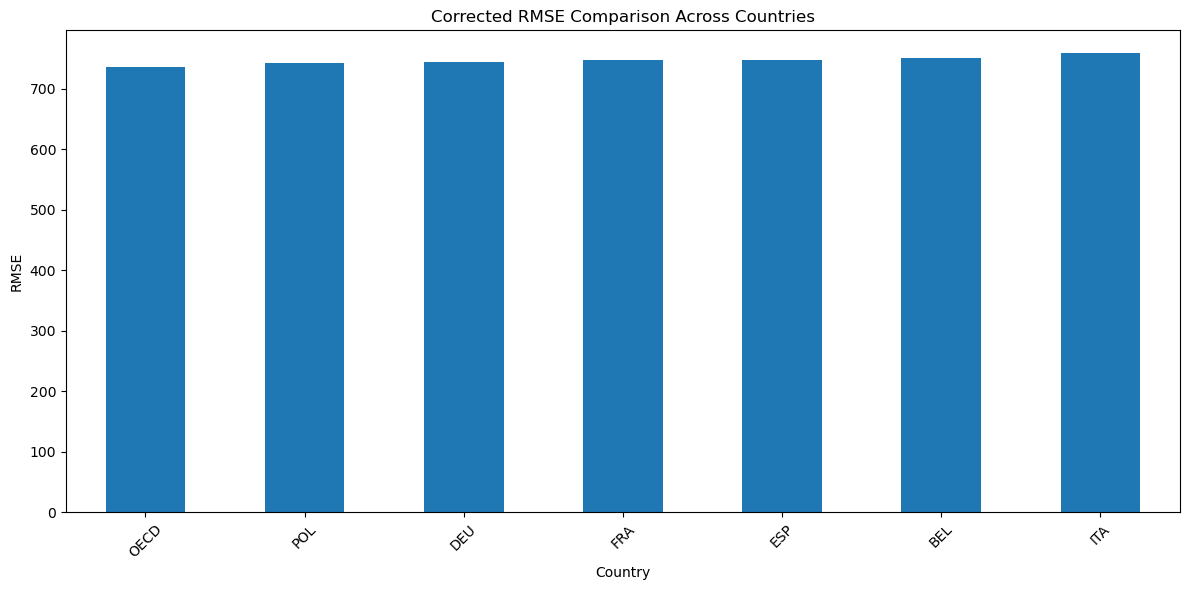

,RMSE
Country,
OECD,736.347877
POL,742.874267
DEU,744.208010
FRA,747.199876
ESP,748.373009
BEL,751.457359
ITA,758.930357


In [25]:
from math import sqrt
from sklearn.metrics import mean_squared_error
# Step 1: ADF test for stationarity
def adf_test(series, country):
    result = adfuller(series)
    print(f"ADF Test for {country}:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"{key}: {value}")
    if result[1] > 0.05:
        print(f"{country} is non-stationary.")
    else:
        print(f"{country} is stationary.")

# Differencing to achieve stationarity
data_diff = data_pivoted.diff().dropna()

# Step 2: ARIMA grid search to find best parameters
def arima_grid_search(series, p_values, d_values, q_values):
    best_aic = float("inf")
    best_order = None
    for p, d, q in itertools.product(p_values, d_values, q_values):
        try:
            model = ARIMA(series, order=(p, d, q)).fit()
            if model.aic < best_aic:
                best_aic = model.aic
                best_order = (p, d, q)
        except:
            continue
    return best_order, best_aic

# Define parameter ranges
p_values = range(0, 3)
d_values = [1]
q_values = range(0, 3)

# Find best parameters for each country
best_params = {}
fitted_models = {}
for country in data_diff.columns:
    print(f"\nFinding best ARIMA parameters for {country}")
    best_order, best_aic = arima_grid_search(data_diff[country], p_values, d_values, q_values)
    best_params[country] = best_order
    print(f"Best ARIMA order for {country}: {best_order} | AIC: {best_aic}")

    # Fit the ARIMA model with the best parameters
    model = ARIMA(data_diff[country], order=best_order).fit()
    fitted_models[country] = model

# Step 3: Forecasting and Evaluation
forecast_horizon = 12
corrected_forecast_results = {}
corrected_rmse_results = {}

for country, model in fitted_models.items():
    print(f"\nForecasting for {country} with Corrected Scaling")
    
    # Generate forecast from differenced model
    forecast_diff = model.forecast(steps=forecast_horizon)
    
    # Reconstruct original scale
    last_value = data_pivoted[country].iloc[-1]
    forecast_original = forecast_diff.cumsum() + last_value
    corrected_forecast_results[country] = forecast_original

    # Prepare train-test split for evaluation
    train = data_pivoted[country][:-forecast_horizon].dropna()
    test = data_pivoted[country][-forecast_horizon:].dropna()
    
    # Re-fit model on training data for evaluation
    eval_model = ARIMA(train, order=best_params[country]).fit()
    eval_forecast_diff = eval_model.forecast(steps=forecast_horizon)
    eval_forecast_original = eval_forecast_diff.cumsum() + train.iloc[-1]

    # Calculate RMSE
    rmse = sqrt(mean_squared_error(test, eval_forecast_original[:len(test)]))
    corrected_rmse_results[country] = rmse
    print(f"RMSE for {country}: {rmse}")

# Step 4: Visualization - Forecast vs Actual
for country, forecast in corrected_forecast_results.items():
    test_index = data_pivoted.index[-forecast_horizon:]
    
    plt.figure(figsize=(10, 6))
    plt.plot(data_pivoted[country], label='Actual Data')
    plt.plot(test_index, forecast, label='Forecast', linestyle='--')
    plt.title(f"Forecast vs Actual for {country} (Corrected)")
    plt.legend()
    plt.show()

# Step 5: RMSE Comparison Across Countries
corrected_rmse_df = pd.DataFrame(list(corrected_rmse_results.items()), columns=['Country', 'RMSE']).set_index('Country')
corrected_rmse_df.sort_values(by='RMSE', inplace=True)

# Display RMSE Comparison
corrected_rmse_df.plot(kind='bar', figsize=(12, 6), title='Corrected RMSE Comparison Across Countries', legend=False)
plt.ylabel('RMSE')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

corrected_rmse_df

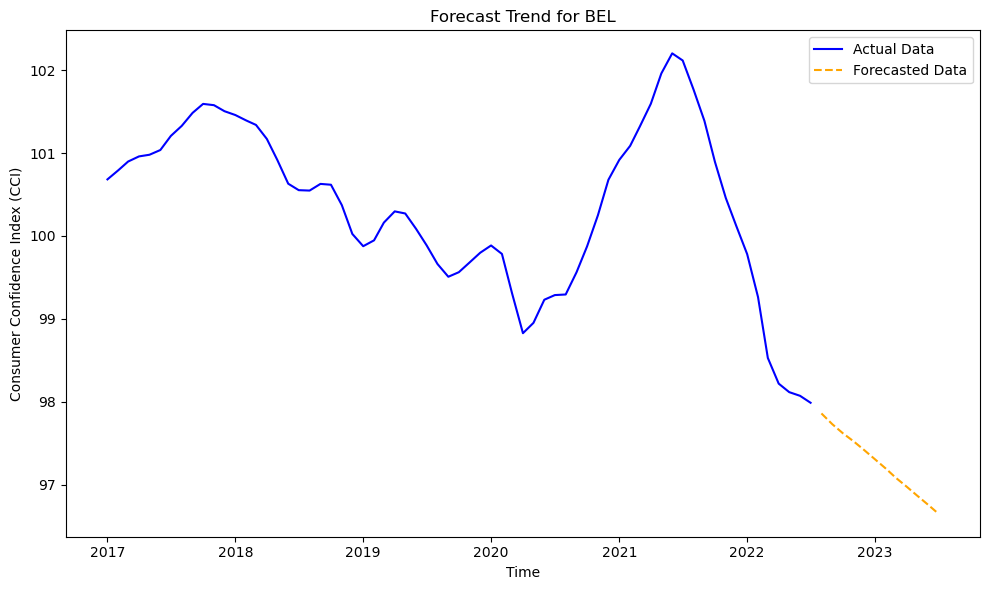

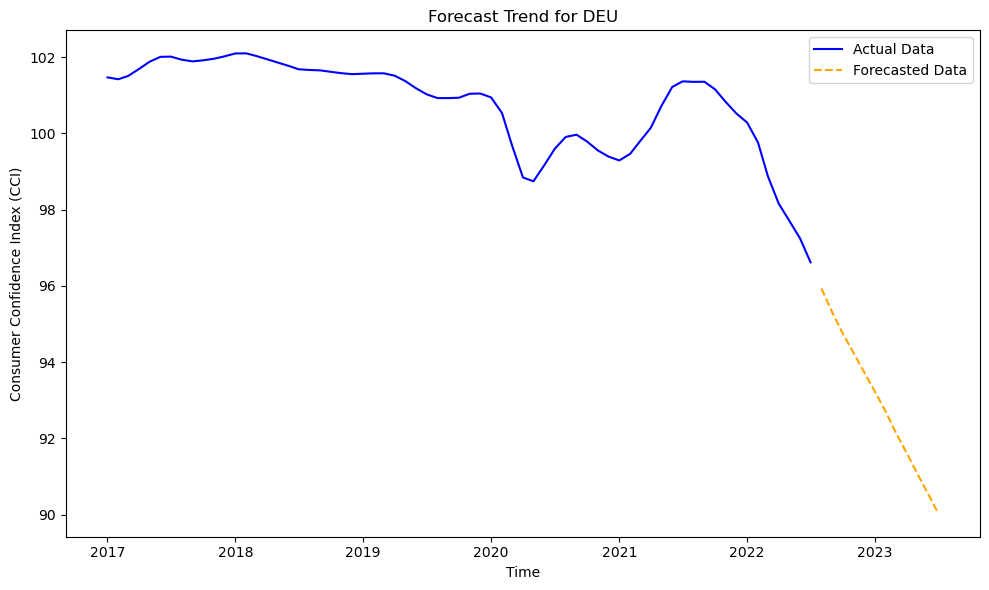

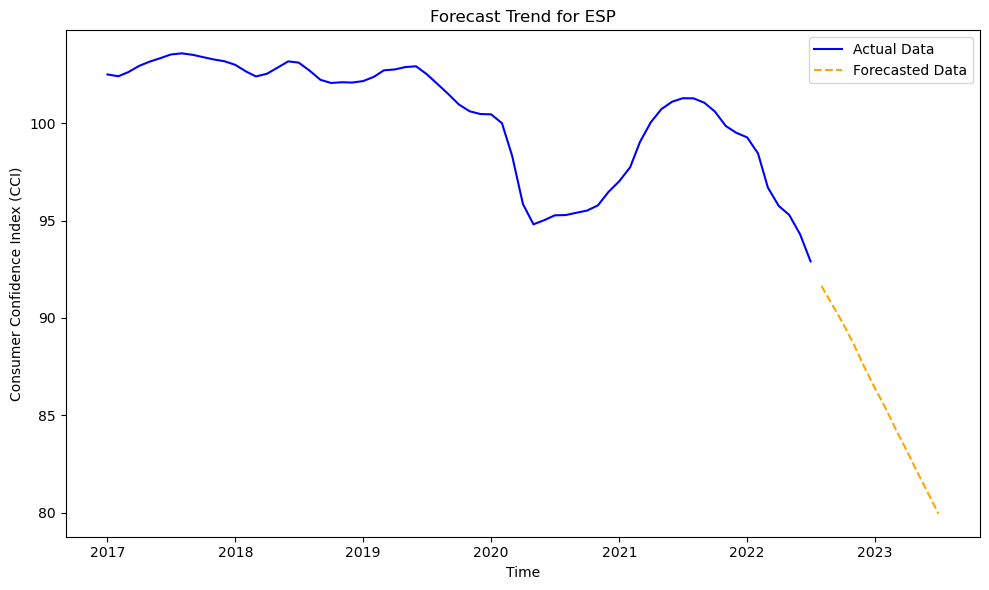

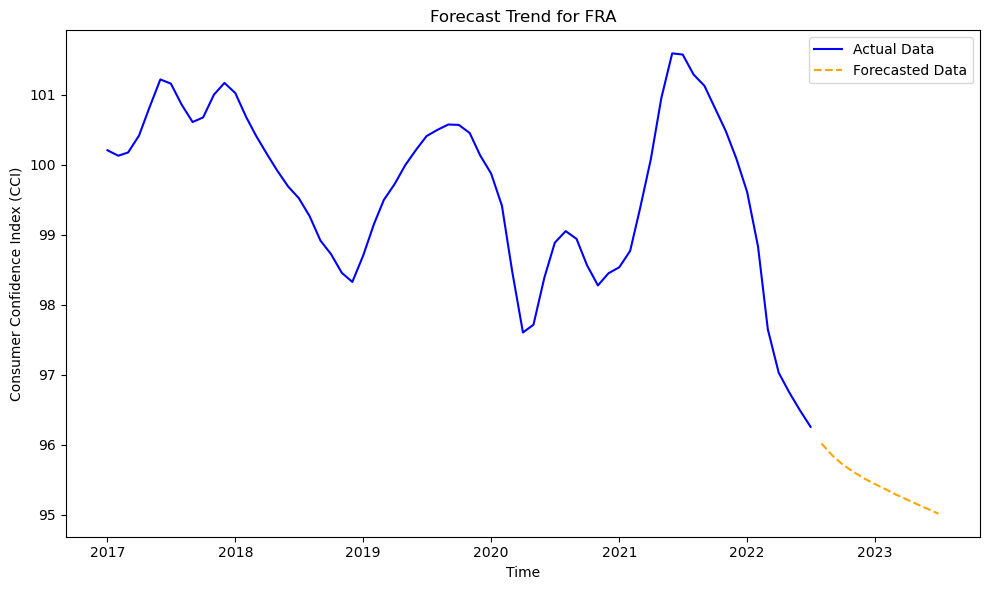

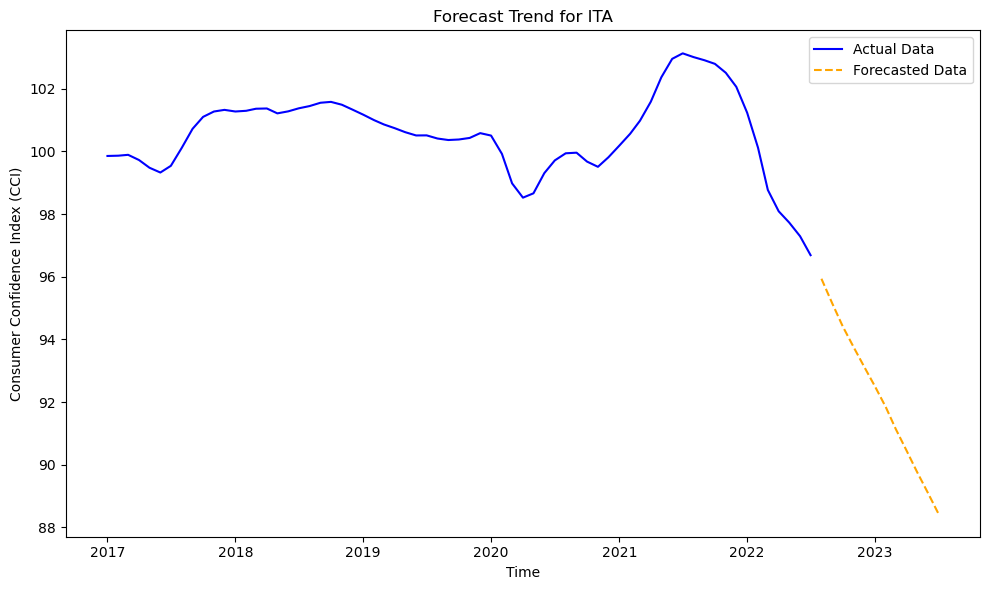

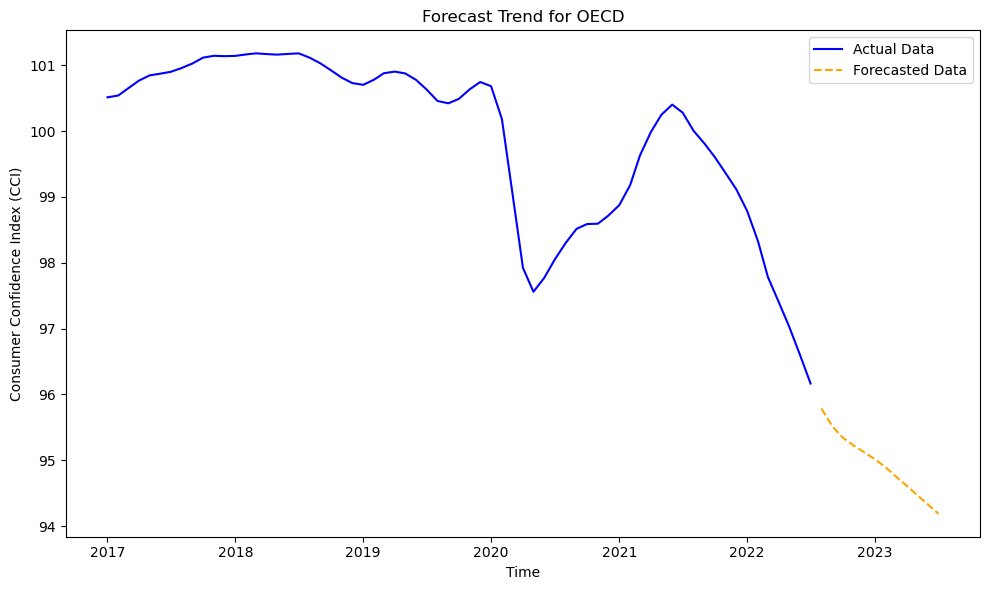

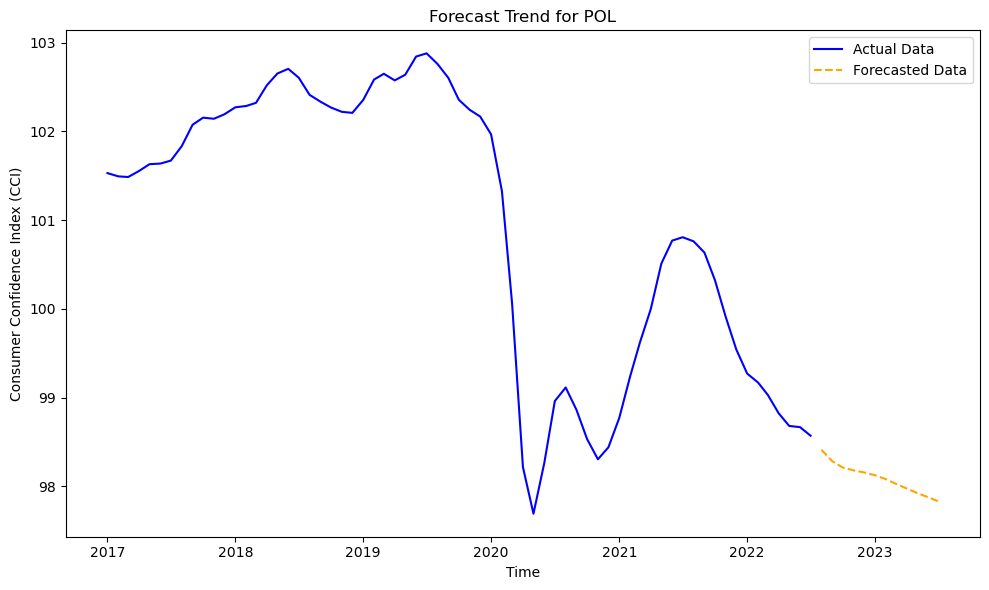

In [12]:
# Visualize forecast trends for each country
for country, forecast in corrected_forecast_results.items():
    plt.figure(figsize=(10, 6))
    plt.plot(data_pivoted[country], label='Actual Data', color='blue')
    plt.plot(forecast.index, forecast, label='Forecasted Data', linestyle='--', color='orange')
    plt.title(f"Forecast Trend for {country}")
    plt.xlabel('Time')
    plt.ylabel('Consumer Confidence Index (CCI)')
    plt.legend()
    plt.tight_layout()
    plt.show()